# Earthdata GIS SWOT Rivers Feature Service Access - Programmatic

Authored by Nicholas Tarpinian, *PO.DAAC*


## Summary

The following instructions let you connect to [Earthdata GIS (EGIS)](https://gis.earthdata.nasa.gov/portal/home/index.html) endpoints programattically. This guide lets you connect to the recently released Surface Water and Ocean Topography (SWOT) Feature Service of the [SWOT_L2_HR_RiverSP_D](https://podaac.jpl.nasa.gov/dataset/SWOT_L2_HR_RiverSP_D) River Reach collection.

For more details on these services and the latest available services, please visit the [EGIS SWOT Feature Service page](../notebooks/GIS/SWOT_Rivers_EGIS_Services.md):

[SWOT_L2_HR_RiverSP_reach_vD](https://gis.earthdata.nasa.gov/portal/home/item.html?id=7f510639ede7482d822b8b2b5b0e7423)

[SWOT_L2_HR_RiverSP_reach_vD_BASIC](https://gis.earthdata.nasa.gov/portal/home/item.html?id=a5573390413f4350a8ce7ecc69ded590)

------

### Learning Objectives:
- Connecting to the SWOT Rivers Feature Service with Python.
- Exploring the collection and plotting through an interactive map GUI.
- Querying the service through different parameters.
- Creating a time series plot.

------

### Import libraries

In [1]:
import leafmap
import requests
import ipysheet
import pandas as pd
import matplotlib.pyplot as plt

The SWOT Rivers Feature Service endpoint can be queried through the ArcGIS REST endpoint. To reach the query URL of the service, first open the URL endpoint by selecting view and then select the feature service layer, as shown below:

<nop/> <div style="width: 600px;">![](../../images/EGIS_SWOT_Images/attachment:EGIS_SWOT_Python_1.png)</div>

<nop/> <div style="width: 600px;">![](../../images/EGIS_SWOT_Images/EGIS_SWOT_Python_2.png)</div>

Next all the way at the end of the webpage you will reach the `Supported Operations` section which is where you will select `Query`. That query URL will now be used to search through the feature service. 

https://gis.earthdata.nasa.gov/image/rest/services/C3233944997_POCLOUD/SWOT_L2_HR_RiverSP_reach_vD_BASIC/FeatureServer/1/query 

<nop/> <div style="width: 700px;">![](../../images/EGIS_SWOT_Images/EGIS_SWOT_Python_3.png)</div>

We will utilize the Python package [leafmap](https://leafmap.org/) to plot data pulled through the service onto an interactive map. 

You can use [bbox finder](http://bboxfinder.com/) to search for an area of interest, which helps in getting a quicker response time. 

Here we will be searching for Lake Powell, USA.

In [2]:
bbox = "-112.188137,36.323246,-109.644802,37.995725"  # xmin,ymin,xmax,ymax
url = "https://gis.earthdata.nasa.gov/image/rest/services/C3233944997_POCLOUD/SWOT_L2_HR_RiverSP_reach_vD_BASIC/FeatureServer/1/query"

params = {
    "where": "1=1",
    "outFields": "*",  # '*' returns all fields or can specify specific fields
    "geometry": bbox,
    "geometryType": "esriGeometryEnvelope",
    "inSR": "4326",
    "spatialRel": "esriSpatialRelIntersects",
    "f": "geojson",
    "resultRecordCount": 10000,  # max record number of features server can return
}

response = requests.get(url, params=params)
geojson = response.json()
print("Status code:", response.status_code)
print("response:", response.text[:500])

Status code: 200
response: {"type":"FeatureCollection","features":[{"type":"Feature","id":370332,"geometry":{"type":"LineString","coordinates":[[-110.47415790399998,37.256347604000041],[-110.47313850199998,37.256992075000028],[-110.47245964499996,37.257313554000064],[-110.47144021599996,37.257958011000028],[-110.46973923199994,37.259302495000043],[-110.46837650099997,37.26064847300006],[-110.46769682999997,37.261078088000033],[-110.46599990999999,37.261827616000062],[-110.46532021499996,37.262257217000069],[-110.464299508


In [3]:
# Creates a map with the queried data with leafmap
m = leafmap.Map(center=[37.05, -111.3], zoom=10)
m.add_geojson(geojson, layer_name="Lake Powell Features")
m

Map(center=[37.05, -111.3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

We can also search by a specific river name, for example the Colorado River.

In [4]:
url = "https://gis.earthdata.nasa.gov/image/rest/services/C3233944997_POCLOUD/SWOT_L2_HR_RiverSP_reach_vD_BASIC/FeatureServer/1/query"
params = {
    "where": "river_name='Colorado River'",  # Change to your river reach of interest
    "outFields": "*",
    "f": "geojson",
    "resultRecordCount": 10000
}

response = requests.get(url, params=params)
geojson = response.json()
print("Status code:", response.status_code)
print("response:", response.text[:500])

Status code: 200
response: {"type":"FeatureCollection","features":[{"type":"Feature","id":13817,"geometry":{"type":"LineString","coordinates":[[-115.05913648399996,32.000165692000053],[-115.05935570299999,31.99980826500007],[-115.05967313099995,31.999813122000035],[-115.05966515199998,32.000191820000055],[-115.05974486099996,32.000427547000072],[-115.05975424599995,32.000986902000079],[-115.05986982199994,32.001529841000036],[-115.06011237299998,32.002074723000078],[-115.06048304099994,32.002567447000047],[-115.0609852449


In [5]:
m = leafmap.Map(center=[40, -100], zoom=5)
m.add_geojson(geojson, layer_name="Colorado River Features")
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

Next example shows how to plot a specific river reach based on its `reach_id` and create a time series chart.

In [6]:
reach_id_value = 77250000051

url = "https://gis.earthdata.nasa.gov/image/rest/services/C3233944997_POCLOUD/SWOT_L2_HR_RiverSP_reach_vD_BASIC/FeatureServer/1/query"
params = {
    "where": "reach_id='77250000051'", # Change to your reach_id of interest
    "outFields": "time_str,wse",
    "f": "geojson",
    "orderByFields": "time_str ASC",
    "resultRecordCount": 500
}

response = requests.get(url, params=params)
geojson = response.json()
print("Status code:", response.status_code)
print("response:", response.text[:500])

Status code: 200
response: {"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"LineString","coordinates":[[-111.68443226199997,36.746592557000042],[-111.68276167799996,36.747683910000035],[-111.68242803499999,36.747956262000059],[-111.68142517599995,36.748556975000042],[-111.67974973599996,36.749107436000031],[-111.67908050599999,36.74943578400007],[-111.67874636599998,36.749654041000042],[-111.67673720799996,36.750476801000048],[-111.67606605399999,36.75058879200003],[-111.67506026999996,36.7508


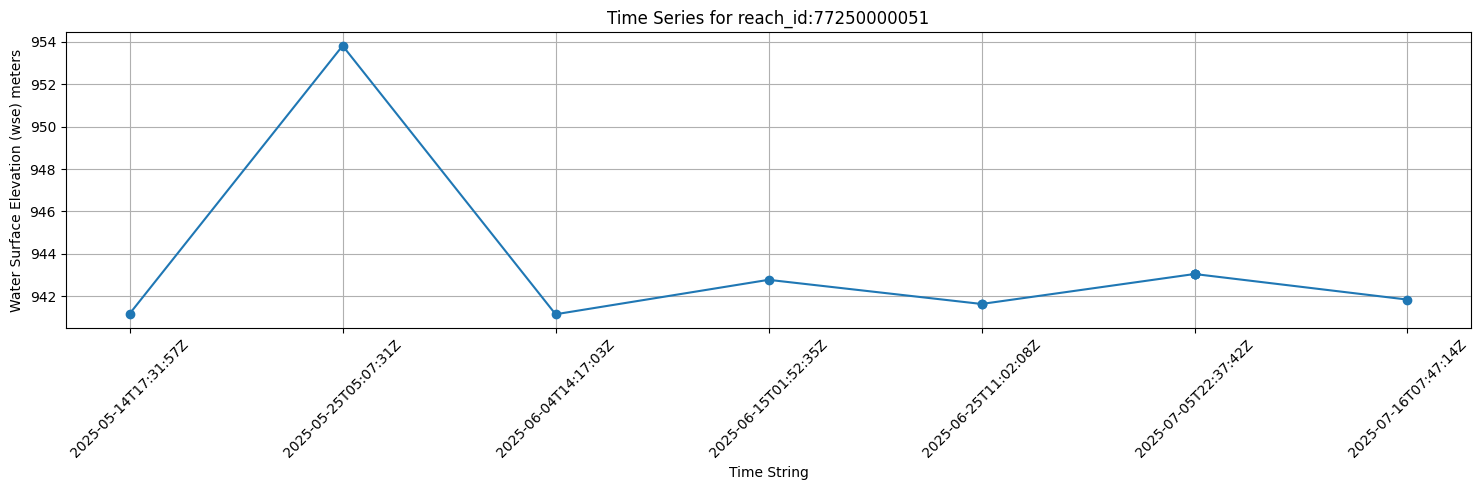

In [7]:
records = [f["properties"] for f in geojson["features"]]
df = pd.DataFrame(records)
plt.figure(figsize=(15, 5))
plt.plot(df["time_str"], df["wse"], marker='o')
plt.xlabel("Time String")
plt.ylabel("Water Surface Elevation (wse) meters")
plt.title(f"Time Series for reach_id:{reach_id_value}")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Plotting the reach_id on the map
m = leafmap.Map(center=[40, -100], zoom=5)
m.add_geojson(geojson, layer_name=f"Reach ID:{reach_id_value}")
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

You also have the option to search through time.

In [9]:
url = "https://gis.earthdata.nasa.gov/image/rest/services/C3233944997_POCLOUD/SWOT_L2_HR_RiverSP_reach_vD_BASIC/FeatureServer/1/query"
params = {
    "where": "time_str >= '2025-05-07T00:00:00Z' AND time_str <= '2025-05-07T23:59:59Z'",
    "outFields": "*",
    "f": "geojson",
    "orderByFields": "time_str ASC",
    "resultRecordCount": 5000
}
response = requests.get(url, params=params)
geojson = response.json()
print("Status code:", response.status_code)
print("First 500 chars of response:", response.text[:500])

Status code: 200
First 500 chars of response: {"type":"FeatureCollection","features":[{"type":"Feature","id":74519,"geometry":{"type":"LineString","coordinates":[[102.23623453100004,77.248313629000052],[102.23629178900006,77.248045112000057],[102.23591987900005,77.247503018000032],[102.23463249200006,77.246682287000056],[102.23444658800008,77.246411240000043],[102.23401750700003,77.246137661000034],[102.23383162300007,77.245866613000032],[102.23211553300007,77.244772291000061],[102.23144340400006,77.244496176000041],[102.23101445000003,77.2


In [10]:
m = leafmap.Map(center=[40, -100], zoom=3)
m.add_geojson(geojson, layer_name="Time Filtered Features")
m

Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

### Bonus

If you would like to create a longer time series chart of a river reach, use SWOT Version C (2.0) collection, which is also available as a feature service.

Status code: 200
response: {"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"LineString","coordinates":[[-111.68443226199997,36.746592557000042],[-111.68276167799996,36.747683910000035],[-111.68242803499999,36.747956262000059],[-111.68142517599995,36.748556975000042],[-111.67974973599996,36.749107436000031],[-111.67908050599999,36.74943578400007],[-111.67874636599998,36.749654041000042],[-111.67673720799996,36.750476801000048],[-111.67606605399999,36.75058879200003],[-111.67506026999996,36.7508


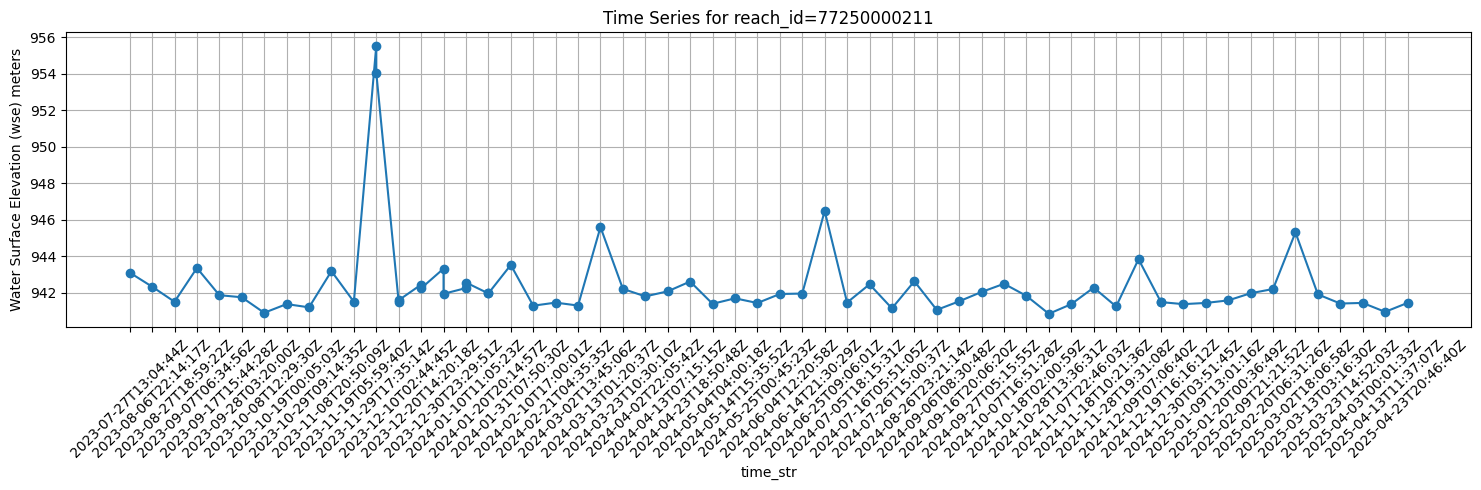

In [11]:
reach_id_value = 77250000211

url = "https://gis.earthdata.nasa.gov/image/rest/services/C2799438299_POCLOUD/SWOT_L2_HR_RiverSP_reach_vC_BASIC/FeatureServer/1/query"
params = {
    "where": "reach_id='77250000211'",
    "outFields": "time_str,wse",
    "f": "geojson",
    "orderByFields": "time_str ASC",
    "resultRecordCount": 10000
}
response = requests.get(url, params=params)
geojson = response.json()
print("Status code:", response.status_code)
print("response:", response.text[:500])

records = [f["properties"] for f in geojson["features"]]
df = pd.DataFrame(records)
plt.figure(figsize=(15, 5))
plt.plot(df["time_str"], df["wse"], marker='o')
plt.xlabel("time_str")
plt.ylabel("Water Surface Elevation (wse) meters")
plt.title(f"Time Series for reach_id={reach_id_value}")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()